# Análisis en los comentarios

In [17]:
# Importamos las librerías

import re
import nltk
import pandas as pd
from datetime import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from nltk.tokenize import RegexpTokenizer

import gensim
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

###Diccionarios en español para el análisis de polaridad
nltk.download('punkt')
# Tokenización
# Descargar el conjunto de stopwords en español si no lo tienes
nltk.download('stopwords')
# Análisis de polaridad
# Obtención de listado de stopwords del inglés
stop_words = list(stopwords.words('spanish'))

[nltk_data] Downloading package punkt to /home/cygnus/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/cygnus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
df_coments = pd.read_csv("twitter_coments_lemus.csv", usecols=["css-901oao 4", "css-901oao 11", "css-901oao 14"])
df_coments=df_coments.fillna('')
df_coments["texto"] = df_coments["css-901oao 4"] + ' ' + df_coments["css-901oao 11"] + ' ' + df_coments["css-901oao 14"]
df_coments = df_coments.drop("css-901oao 4", axis=1)
df_coments = df_coments.drop("css-901oao 11", axis=1)
df_coments = df_coments.drop("css-901oao 14", axis=1)
df_coments

,texto
0,"Que gusto poder acompañarlos el día de hoy, en..."
1,"Muchas gracias, amigo. Sin tu apoyo esto no hu..."
2,76
3,se han realizado no menos de cuatro reportes s...
4,Te felicito amigo @JuanJoseFrangie
...,...
815,"No creo, mira lo que han hecho en Zapopan esos..."
816,Animo Guadalajara!! @hagala_ @Trafico_ZMG
817,"Oye de mi gran amigo el Doc lomeli, no vas a e..."
818,@MilyRocha19 @felixgastelum1


In [19]:
def limpiar_texto(texto):
    # Eliminar caracteres especiales y números
    texto_limpio = re.sub(r'[^\w\sáéíóúüÁÉÍÓÚÜñ]', '', texto, flags=re.UNICODE)
    # Eliminar espacios en blanco adicionales y convertir a minúsculas
    texto_limpio = ' '.join(texto_limpio.split()).lower()
    return texto_limpio

df_coments["texto"] = df_coments["texto"].apply(limpiar_texto)
df_coments_clean = df_coments.copy()
df_coments

,texto
0,que gusto poder acompañarlos el día de hoy en ...
1,muchas gracias amigo sin tu apoyo esto no hubi...
2,76
3,se han realizado no menos de cuatro reportes s...
4,te felicito amigo juanjosefrangie
...,...
815,no creo mira lo que han hecho en zapopan esos ...
816,animo guadalajara hagala_ trafico_zmg
817,oye de mi gran amigo el doc lomeli no vas a es...
818,milyrocha19 felixgastelum1


In [20]:
df_coments['texto'] = df_coments['texto'].str.lower()
tokenizer = RegexpTokenizer(r'\w+')
df_coments['tokens'] = df_coments['texto'].apply(tokenizer.tokenize)
df_coments.to_csv("coments_x.csv")
df_coments

,texto,tokens
0,que gusto poder acompañarlos el día de hoy en ...,"[que, gusto, poder, acompañarlos, el, día, de,..."
1,muchas gracias amigo sin tu apoyo esto no hubi...,"[muchas, gracias, amigo, sin, tu, apoyo, esto,..."
2,76,[76]
3,se han realizado no menos de cuatro reportes s...,"[se, han, realizado, no, menos, de, cuatro, re..."
4,te felicito amigo juanjosefrangie,"[te, felicito, amigo, juanjosefrangie]"
...,...,...
815,no creo mira lo que han hecho en zapopan esos ...,"[no, creo, mira, lo, que, han, hecho, en, zapo..."
816,animo guadalajara hagala_ trafico_zmg,"[animo, guadalajara, hagala_, trafico_zmg]"
817,oye de mi gran amigo el doc lomeli no vas a es...,"[oye, de, mi, gran, amigo, el, doc, lomeli, no..."
818,milyrocha19 felixgastelum1,"[milyrocha19, felixgastelum1]"


In [21]:
# Se añade la stoprword: amp, ax, ex
stop_words.extend(("q", "d", "van", "si", "pa", "así", "ser", "solo", "tan", "va", "as",
                "le", "con","ella", "qué", "por", "qu", "ers", "das", "ve", "jajaja", "jeje", "La", "nimo", "ms", "da"))

In [22]:
# Filtrado para excluir stopwords
# ==============================================================================
tweets_tidy = df_coments[~(df_coments["tokens"].isin(stop_words))]
tweets_tidy

,texto,tokens
0,que gusto poder acompañarlos el día de hoy en ...,"[que, gusto, poder, acompañarlos, el, día, de,..."
1,muchas gracias amigo sin tu apoyo esto no hubi...,"[muchas, gracias, amigo, sin, tu, apoyo, esto,..."
2,76,[76]
3,se han realizado no menos de cuatro reportes s...,"[se, han, realizado, no, menos, de, cuatro, re..."
4,te felicito amigo juanjosefrangie,"[te, felicito, amigo, juanjosefrangie]"
...,...,...
815,no creo mira lo que han hecho en zapopan esos ...,"[no, creo, mira, lo, que, han, hecho, en, zapo..."
816,animo guadalajara hagala_ trafico_zmg,"[animo, guadalajara, hagala_, trafico_zmg]"
817,oye de mi gran amigo el doc lomeli no vas a es...,"[oye, de, mi, gran, amigo, el, doc, lomeli, no..."
818,milyrocha19 felixgastelum1,"[milyrocha19, felixgastelum1]"


In [23]:
##########NUBE DE PALABRAS
def preprocess_text(text):
    words = text # Tokenizar y convertir a minúsculas
    words = [word for word in words if word.isalpha()]  # Eliminar caracteres no alfabéticos
    words = [word for word in words if word not in stop_words]  # Eliminar palabras vacías
    return words


preprocessed_text = tweets_tidy["tokens"].apply(preprocess_text)

preprocessed_text

0      [gusto, poder, acompañarlos, día, hoy, represe...
1      [muchas, gracias, amigo, apoyo, sido, posible,...
2                                                     []
3      [realizado, menos, cuatro, reportes, tener, re...
4                     [felicito, amigo, juanjosefrangie]
                             ...                        
815    [creo, mira, hecho, zapopan, gobiernos, danted...
816                                 [animo, guadalajara]
817    [oye, gran, amigo, doc, lomeli, vas, hablando,...
818                                                   []
819                                                   []
Name: tokens, Length: 820, dtype: object

In [24]:
# Unimos todas las listas de palabras en una sola lista
all_words = [word for sublist in preprocessed_text.values for word in sublist]

# Creamos un DataFrame con las palabras y sus frecuencias
word_counts = pd.Series(all_words).value_counts()

# Tomamos las palabras más comunes (puedes ajustar este valor según tus necesidades)
top_words = word_counts.head(10)
top_words.to_csv("top_words_coments.csv")
type(top_words)

pandas.core.series.Series

In [25]:
word_counts

pablolemusn    309
gracias         47
jalisco         42
ánimo           41
guadalajara     39
              ... 
maria            1
aspiroz          1
adentro          1
quemando         1
hablando         1
Name: count, Length: 2627, dtype: int64

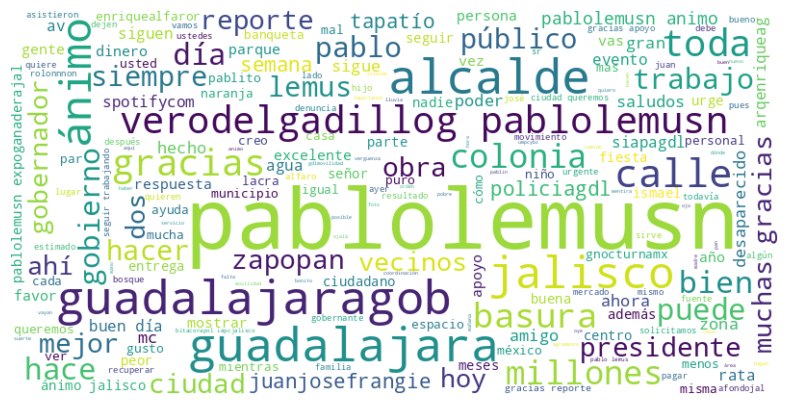

In [26]:
# Unir las palabras en un solo texto (separadas por espacios)
texto = " ".join(all_words)
# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texto)
# Mostrar la nube de palabras utilizando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Desactivar ejes
plt.show()

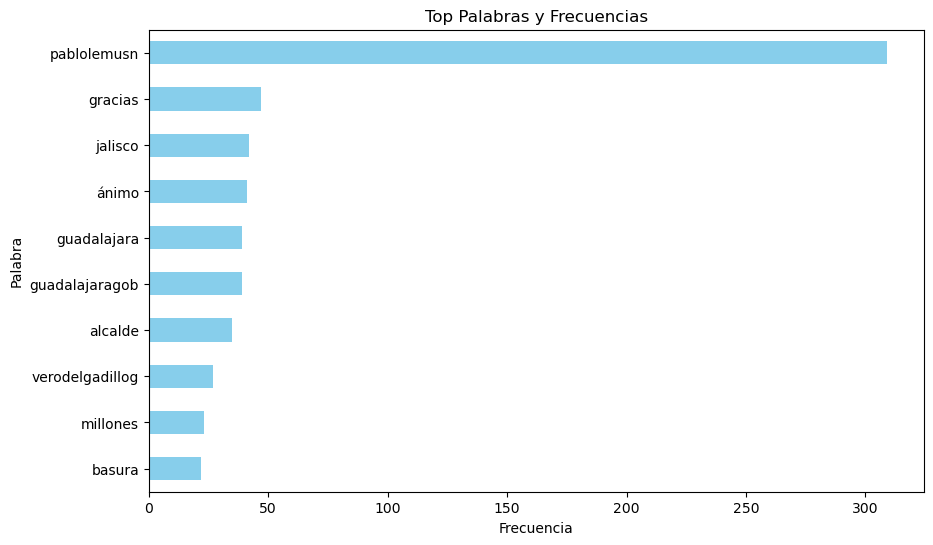

In [27]:
# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
top_words.plot(kind='barh', color='skyblue')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Top Palabras y Frecuencias')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la palabra con la frecuencia más alta en la parte superior
plt.show()

In [31]:
import spacy


# Función para preprocesar el texto
def preprocess_text(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

# Aplicar el preprocesamiento a cada fila del DataFrame
df_coments_clean['texto_preprocesado'] = df_coments_clean['texto'].apply(preprocess_text)
df_coments_clean

NameError: name 'nlp' is not defined

In [30]:
import networkx as nx
from gensim import corpora
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

def generar_bigramas_spacy(texto):
    doc = nlp(texto)
    bigramas = [(doc[i].text, doc[i + 1].text) for i in range(len(doc) - 1)]
    return bigramas

df_coments_clean['bigramas_spacy'] = df_coments_clean['texto'].apply(generar_bigramas_spacy)

# Generación de bigramas con NLTK
def generar_bigramas_nltk(texto):
    tokens = word_tokenize(texto)
    bigramas = list(ngrams(tokens, 2))
    return bigramas

df_coments_clean['bigramas_nltk'] = df_coments_clean['texto'].apply(generar_bigramas_nltk)

# Visualización del DataFrame resultante
df_coments_clean


NameError: name 'nlp' is not defined

In [34]:
import spacy
import pandas as pd
from nltk.util import ngrams
from nltk.tokenize import word_tokenize



# Función para generar n-gramas con NLTK
def generar_ngramas_nltk(texto, n):
    tokens = word_tokenize(texto)
    ngramas = list(ngrams(tokens, n))
    return ngramas

# Definir el valor de 'n' para los n-gramas deseados
n = 3  # Puedes cambiar este valor según el número de palabras en tus n-gramas

# Aplicar las funciones y crear columnas en el DataFrame
df_coments_clean['ngramas_nltk'] = df_coments_clean['texto'].apply(generar_ngramas_nltk, args=(n,))

# Visualización del DataFrame resultante
df_coments_clean


,texto,ngramas_nltk
0,que gusto poder acompañarlos el día de hoy en ...,"[(que, gusto, poder), (gusto, poder, acompañar..."
1,muchas gracias amigo sin tu apoyo esto no hubi...,"[(muchas, gracias, amigo), (gracias, amigo, si..."
2,76,[]
3,se han realizado no menos de cuatro reportes s...,"[(se, han, realizado), (han, realizado, no), (..."
4,te felicito amigo juanjosefrangie,"[(te, felicito, amigo), (felicito, amigo, juan..."
...,...,...
815,no creo mira lo que han hecho en zapopan esos ...,"[(no, creo, mira), (creo, mira, lo), (mira, lo..."
816,animo guadalajara hagala_ trafico_zmg,"[(animo, guadalajara, hagala_), (guadalajara, ..."
817,oye de mi gran amigo el doc lomeli no vas a es...,"[(oye, de, mi), (de, mi, gran), (mi, gran, ami..."
818,milyrocha19 felixgastelum1,[]


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from itertools import chain

# Supongamos que tienes un DataFrame 'df' con la columna 'ngramas_spacy'
# df = ...

# Combina todos los n-gramas en una lista plana
ngramas = list(chain.from_iterable(df_coments_clean['ngramas_nltk']))

# Calcula la frecuencia de cada n-grama
frecuencia_ngramas = Counter(ngramas)

# Obtén los n-gramas más comunes (puedes ajustar la cantidad que deseas mostrar)
ngramas_comunes = frecuencia_ngramas.most_common(10)
# Extrae los n-gramas y sus frecuencias
ngramas, frecuencias = zip(*ngramas_comunes)

frecuencia_ngramas

Counter({('los', '300', 'millones'): 12,
         ('el', 'alcalde', 'de'): 9,
         ('gracias', 'por', 'el'): 8,
         ('muchas', 'gracias', 'por'): 7,
         ('por', 'la', 'ciudad'): 7,
         ('gracias', 'por', 'la'): 6,
         ('alcalde', 'de', 'guadalajara'): 6,
         ('a', 'seguir', 'trabajando'): 5,
         ('la', 'ciudad', 'que'): 5,
         ('ciudad', 'que', 'queremos'): 5,
         ('300', 'millones', 'que'): 5,
         ('y', 'los', '300'): 5,
         ('en', 'las', 'calles'): 5,
         ('el', 'centro', 'de'): 5,
         ('en', 'la', 'zona'): 5,
         ('las', 'y', 'los'): 4,
         ('por', 'el', 'reporte'): 4,
         ('el', 'reporte', 'se'): 4,
         ('y', '16', 'de'): 4,
         ('16', 'de', 'septiembre'): 4,
         ('la', 'virgen', 'de'): 4,
         ('virgen', 'de', 'zapopan'): 4,
         ('que', 'te', 'robaste'): 4,
         ('en', 'toda', 'la'): 4,
         ('toda', 'la', 'ciudad'): 4,
         ('el', 'alcalde', 'tapatío'): 4,
         (

In [16]:
# Cargar el modelo de spaCy en español
nlp = spacy.load("es_core_news_sm")

# Función para lematizar el texto
def lematizar_texto(texto):
    doc = nlp(texto)
    lemas = [token.lemma_ for token in doc]
    return " ".join(lemas)

# Aplicar la función de lematización a cada fila del DataFrame
df_coments_clean['texto_lematizado'] = df_coments_clean['texto'].apply(lematizar_texto)

# Visualización del DataFrame resultante
df_coments_clean

,texto,texto_preprocesado,bigramas_spacy,bigramas_nltk,ngramas_spacy,ngramas_nltk,texto_lematizado
0,que gusto poder acompañarlos el día de hoy en ...,"[gusto , acompañar él, representación, alcalde]","[(que, gusto), (gusto, poder), (poder, acompañ...","[(que, gusto), (gusto, poder), (poder, acompañ...","[(que, gusto, poder), (gusto, poder, acompañar...","[(que, gusto, poder), (gusto, poder, acompañar...",que gusto poder acompañar él el día de hoy en...
1,muchas gracias amigo sin tu apoyo esto no hubi...,"[gracia, amigo, apoyo, haber, pablolemusn]","[(muchas, gracias), (gracias, amigo), (amigo, ...","[(muchas, gracias), (gracias, amigo), (amigo, ...","[(muchas, gracias, amigo), (gracias, amigo, si...","[(muchas, gracias, amigo), (gracias, amigo, si...",mucho gracia amigo sin tu apoyo este no haber ...
2,76,[],[],[],[],[],76
3,se han realizado no menos de cuatro reportes s...,"[report, respuesta, ojalá, poder, lograr, reti...","[(se, han), (han, realizado), (realizado, no),...","[(se, han), (han, realizado), (realizado, no),...","[(se, han, realizado), (han, realizado, no), (...","[(se, han, realizado), (han, realizado, no), (...",él haber realizar no menos de cuatro report si...
4,te felicito amigo juanjosefrangie,"[felicito, amigo, juanjosefrangie]","[(te, felicito), (felicito, amigo), (amigo, ju...","[(te, felicito), (felicito, amigo), (amigo, ju...","[(te, felicito, amigo), (felicito, amigo, juan...","[(te, felicito, amigo), (felicito, amigo, juan...",tú felicito amigo juanjosefrangie
...,...,...,...,...,...,...,...
815,no creo mira lo que han hecho en zapopan esos ...,"[mirar, zapopar, gobierno, dantedelgado]","[(no, creo), (creo, mira), (mira, lo), (lo, qu...","[(no, creo), (creo, mira), (mira, lo), (lo, qu...","[(no, creo, mira), (creo, mira, lo), (mira, lo...","[(no, creo, mira), (creo, mira, lo), (mira, lo...",no creer mirar él que haber hacer en zapopar e...
816,animo guadalajara hagala_ trafico_zmg,"[animo, guadalajara, hagala]","[(animo, guadalajara), (guadalajara, hagala), ...","[(animo, guadalajara), (guadalajara, hagala_),...","[(animo, guadalajara, hagala), (guadalajara, h...","[(animo, guadalajara, hagala_), (guadalajara, ...",animo guadalajara hagala _ trafico_zmg
817,oye de mi gran amigo el doc lomeli no vas a es...,"[oir, amigo, doc, lomeli, ir, hablar, bitacora...","[(oye, de), (de, mi), (mi, gran), (gran, amigo...","[(oye, de), (de, mi), (mi, gran), (gran, amigo...","[(oye, de, mi), (de, mi, gran), (mi, gran, ami...","[(oye, de, mi), (de, mi, gran), (mi, gran, ami...",oir de mi gran amigo el doc lomeli no ir a est...
818,milyrocha19 felixgastelum1,[],"[(milyrocha19, felixgastelum1)]","[(milyrocha19, felixgastelum1)]",[],[],milyrocha19 felixgastelum1


In [17]:
# Aplicar el preprocesamiento a cada fila del DataFrame
df_coments_clean['texto_preprocesado'] = df_coments_clean['texto_lematizado'].apply(preprocess_text)

# Crear un diccionario a partir de los documentos preprocesados
dictionary = corpora.Dictionary(df_coments_clean['texto_preprocesado'])

# Crear una representación BoW de los documentos
corpus = [dictionary.doc2bow(texto) for texto in df_coments_clean['texto_preprocesado']]

num_topics = 10  # Ajusta el número de tópicos según tus necesidades
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Obtener los temas y sus palabras clave
topics = lda_model.print_topics(num_words=15)

# Mostrar los temas y sus palabras clave
for topic in topics:
    print(topic)

(0, '0.039*"pablolemusn" + 0.019*"animo" + 0.016*"presidente" + 0.014*"pablo" + 0.013*"ánimo" + 0.009*"guadalajara" + 0.008*"policiagdl" + 0.008*"gusto" + 0.006*"lemus" + 0.006*"juanjosefrangie" + 0.006*"municipal" + 0.006*"familia" + 0.006*"juan" + 0.006*"acompañar" + 0.006*"ismael"')
(1, '0.040*"pablolemusn" + 0.016*"guadalajara" + 0.012*"alcalde" + 0.007*"deltoroismael" + 0.007*"seguir" + 0.005*"agua" + 0.005*"puro" + 0.005*"mostrar" + 0.005*"dejar" + 0.005*"méxico" + 0.005*"sr" + 0.005*"gobierno" + 0.005*"calle" + 0.004*"par" + 0.004*"ciudad"')
(2, '0.053*"pablolemusn" + 0.013*"gracias" + 0.008*"trabajo" + 0.008*"calle" + 0.008*"deltoroismael" + 0.007*"millón" + 0.007*"excelente" + 0.007*"rata" + 0.006*"presidente" + 0.006*"guadalajara" + 0.006*"afondojal" + 0.006*"expoganaderajal" + 0.004*"platicar" + 0.004*"persona" + 0.004*"animo"')
(3, '0.107*"pablolemusn" + 0.025*"jalisco" + 0.017*"deltoroismael" + 0.011*"seguir" + 0.008*"gobernador" + 0.007*"mc" + 0.007*"desaparecido" + 0.006

In [18]:
print(topics)

[(0, '0.039*"pablolemusn" + 0.019*"animo" + 0.016*"presidente" + 0.014*"pablo" + 0.013*"ánimo" + 0.009*"guadalajara" + 0.008*"policiagdl" + 0.008*"gusto" + 0.006*"lemus" + 0.006*"juanjosefrangie" + 0.006*"municipal" + 0.006*"familia" + 0.006*"juan" + 0.006*"acompañar" + 0.006*"ismael"'), (1, '0.040*"pablolemusn" + 0.016*"guadalajara" + 0.012*"alcalde" + 0.007*"deltoroismael" + 0.007*"seguir" + 0.005*"agua" + 0.005*"puro" + 0.005*"mostrar" + 0.005*"dejar" + 0.005*"méxico" + 0.005*"sr" + 0.005*"gobierno" + 0.005*"calle" + 0.004*"par" + 0.004*"ciudad"'), (2, '0.053*"pablolemusn" + 0.013*"gracias" + 0.008*"trabajo" + 0.008*"calle" + 0.008*"deltoroismael" + 0.007*"millón" + 0.007*"excelente" + 0.007*"rata" + 0.006*"presidente" + 0.006*"guadalajara" + 0.006*"afondojal" + 0.006*"expoganaderajal" + 0.004*"platicar" + 0.004*"persona" + 0.004*"animo"'), (3, '0.107*"pablolemusn" + 0.025*"jalisco" + 0.017*"deltoroismael" + 0.011*"seguir" + 0.008*"gobernador" + 0.007*"mc" + 0.007*"desaparecido" + 0

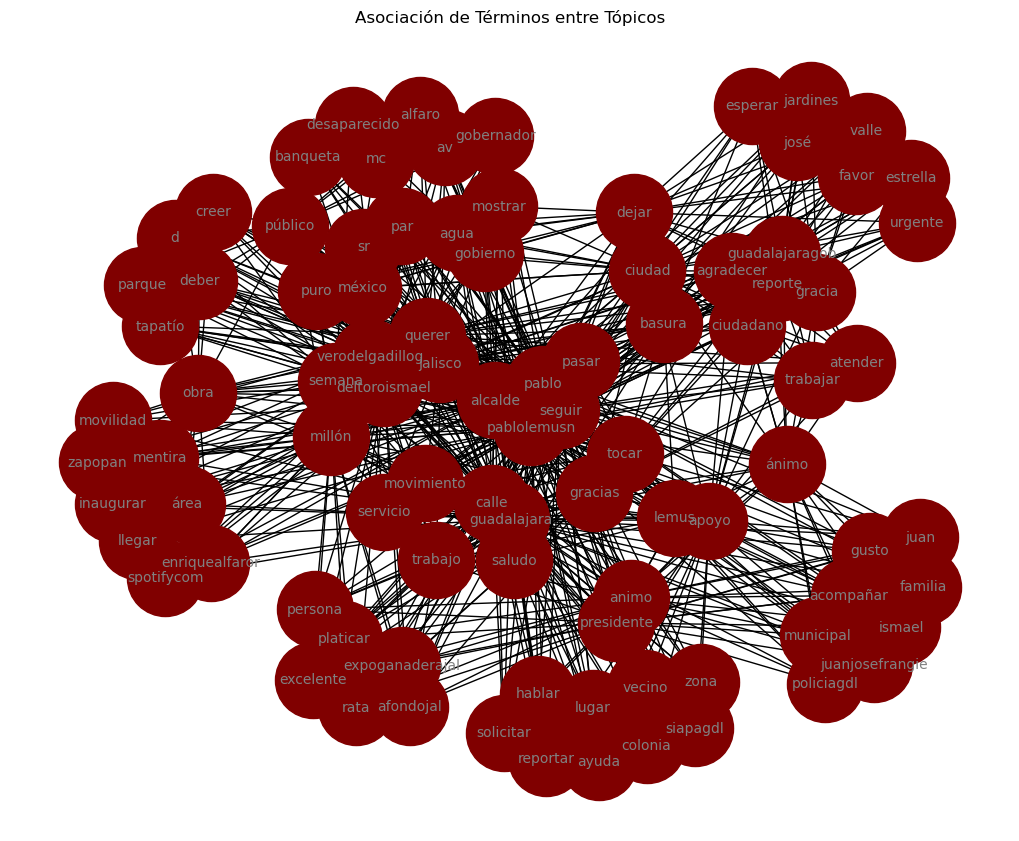

In [19]:
# Crear un grafo de red
G = nx.Graph()

# Procesar los tópicos y sus palabras clave para identificar asociaciones
for topic_id, topic_words in topics:
    # Dividir las palabras clave en términos individuales
    terms = [term.split('*')[1].strip('"') for term in topic_words.split(' + ')]
    
    # Agregar una arista entre todos los términos del tópico
    for i in range(len(terms)):
        for j in range(i + 1, len(terms)):
            term1, term2 = terms[i], terms[j]
            G.add_edge(term1, term2, topic=topic_id)

# Dibujar el gráfico de red
pos = nx.spring_layout(G, k=0.3, iterations=50)
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, font_size=10, node_size=3000, node_color='maroon', font_color='gray')

# Mostrar el gráfico de red
plt.title('Asociación de Términos entre Tópicos')
# Guardar la figura como una imagen
plt.savefig('topicos.png', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
import networkx as nx
import plotly.graph_objects as go

# Crear un grafo de NetworkX
G = nx.Graph()

# Procesar los tópicos y sus palabras clave para identificar asociaciones
for topic_id, topic_words in topics:
    # Dividir las palabras clave en términos individuales
    terms = [term.split('*')[1].strip('"') for term in topic_words.split(' + ')]
    
    # Agregar una arista entre todos los términos del tópico
    for i in range(len(terms)):
        for j in range(i + 1, len(terms)):
            term1, term2 = terms[i], terms[j]
            G.add_edge(term1, term2, topic=topic_id)

# Obtener las posiciones de los nodos en el gráfico
pos = nx.spring_layout(G, k=0.3, iterations=50)

# Extraer las posiciones X e Y de los nodos
pos_x = {node: pos[node][0] for node in G.nodes}
pos_y = {node: pos[node][1] for node in G.nodes}

# Crear un objeto de grafo de Plotly
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos_x[edge[0]], pos_y[edge[0]]
    x1, y1 = pos_x[edge[1]], pos_y[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = list(pos_x.values())
node_y = list(pos_y.values())

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        colorscale='YlGnBu',
        size=10,
        colorbar=dict(thickness=15, title='Node Connections'),
        line_width=2))

node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# de conexiones: ' + str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

# Crear la figura de Plotly
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                showlegend=False,
                hovermode='closest',
                margin=dict(b=0, l=0, r=0, t=0),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

# Mostrar la figura
fig.update_layout(title='Asociación de Términos entre Tópicos', title_x=0.5)
fig.show()

In [ ]:
# Crear un conjunto de términos únicos
unique_terms = set()
for topic_id, topic_words in topics:
    terms = [term.split('*')[1].strip('"') for term in topic_words.split(' + ')]
    unique_terms.update(terms)

# Crear listas para nodos y enlaces
nodes = list(unique_terms)
source_indices = []
target_indices = []
values = []

# Procesar los tópicos y sus palabras clave para identificar las conexiones
for topic_id, topic_words in topics:
    terms = [term.split('*')[1].strip('"') for term in topic_words.split(' + ')]
    for term in terms:
        source_indices.append(nodes.index(term))
        target_indices.append(len(nodes) + topic_id)  # Cada tema se representa como un nodo adicional
        values.append(1)

# Crear un diagrama de Sankey
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes  # Etiquetas de los términos
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values
    )
))

# Mostrar el diagrama de Sankey
fig.update_layout(title_text="Diagrama de Sankey de Tópicos y Términos")
fig.show()

In [ ]:


# Mostrar el DataFrame resultante
df_coments_clean

,texto,texto_preprocesado,bigramas_spacy,bigramas_nltk,texto_lematizado
0,que gusto poder acompañarlos el día de hoy en ...,"[gusto, acompañar, representación, alcalde]","[(que, gusto), (gusto, poder), (poder, acompañ...","[(que, gusto), (gusto, poder), (poder, acompañ...",que gusto poder acompañar él el día de hoy en...
1,muchas gracias amigo sin tu apoyo esto no hubi...,"[gracia, amigo, apoyo, pablolemusn]","[(muchas, gracias), (gracias, amigo), (amigo, ...","[(muchas, gracias), (gracias, amigo), (amigo, ...",mucho gracia amigo sin tu apoyo este no haber ...
2,76,[],[],[],76
3,se han realizado no menos de cuatro reportes s...,"[report, respuesta, ojalá, lograr, retirar, sa...","[(se, han), (han, realizado), (realizado, no),...","[(se, han), (han, realizado), (realizado, no),...",él haber realizar no menos de cuatro report si...
4,te felicito amigo juanjosefrangie,"[felicito, amigo, juanjosefrangie]","[(te, felicito), (felicito, amigo), (amigo, ju...","[(te, felicito), (felicito, amigo), (amigo, ju...",tú felicito amigo juanjosefrangie
...,...,...,...,...,...
815,no creo mira lo que han hecho en zapopan esos ...,"[creer, mirar, zapopar, gobierno, dantedelgado]","[(no, creo), (creo, mira), (mira, lo), (lo, qu...","[(no, creo), (creo, mira), (mira, lo), (lo, qu...",no creer mirar él que haber hacer en zapopar e...
816,animo guadalajara hagala_ trafico_zmg,"[animo, guadalajara, hagala]","[(animo, guadalajara), (guadalajara, hagala), ...","[(animo, guadalajara), (guadalajara, hagala_),...",animo guadalajara hagala _ trafico_zmg
817,oye de mi gran amigo el doc lomeli no vas a es...,"[oir, amigo, doc, lomeli, hablar, bitacorapol,...","[(oye, de), (de, mi), (mi, gran), (gran, amigo...","[(oye, de), (de, mi), (mi, gran), (gran, amigo...",oir de mi gran amigo el doc lomeli no ir a est...
818,milyrocha19 felixgastelum1,[],"[(milyrocha19, felixgastelum1)]","[(milyrocha19, felixgastelum1)]",milyrocha19 felixgastelum1


In [ ]:
nltk.download('punkt')
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def obtener_sentiment(texto):
    analyzer  = SentimentIntensityAnalyzer()
    return analyzer.polarity_scores(texto)["compound"]

df_coments_clean["polaridad"] = df_coments_clean["texto"].apply(obtener_sentiment)
df_coments_clean

[nltk_data] Downloading package punkt to /home/milton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/milton/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,texto,texto_preprocesado,bigramas_spacy,bigramas_nltk,texto_lematizado,polaridad
0,que gusto poder acompañarlos el día de hoy en ...,"[gusto, acompañar, representación, alcalde]","[(que, gusto), (gusto, poder), (poder, acompañ...","[(que, gusto), (gusto, poder), (poder, acompañ...",que gusto poder acompañar él el día de hoy en...,0.0000
1,muchas gracias amigo sin tu apoyo esto no hubi...,"[gracia, amigo, apoyo, pablolemusn]","[(muchas, gracias), (gracias, amigo), (amigo, ...","[(muchas, gracias), (gracias, amigo), (amigo, ...",mucho gracia amigo sin tu apoyo este no haber ...,-0.7003
2,76,[],[],[],76,0.0000
3,se han realizado no menos de cuatro reportes s...,"[report, respuesta, ojalá, lograr, retirar, sa...","[(se, han), (han, realizado), (realizado, no),...","[(se, han), (han, realizado), (realizado, no),...",él haber realizar no menos de cuatro report si...,-0.7003
4,te felicito amigo juanjosefrangie,"[felicito, amigo, juanjosefrangie]","[(te, felicito), (felicito, amigo), (amigo, ju...","[(te, felicito), (felicito, amigo), (amigo, ju...",tú felicito amigo juanjosefrangie,0.0000
...,...,...,...,...,...,...
815,no creo mira lo que han hecho en zapopan esos ...,"[creer, mirar, zapopar, gobierno, dantedelgado]","[(no, creo), (creo, mira), (mira, lo), (lo, qu...","[(no, creo), (creo, mira), (mira, lo), (lo, qu...",no creer mirar él que haber hacer en zapopar e...,-0.2960
816,animo guadalajara hagala_ trafico_zmg,"[animo, guadalajara, hagala]","[(animo, guadalajara), (guadalajara, hagala), ...","[(animo, guadalajara), (guadalajara, hagala_),...",animo guadalajara hagala _ trafico_zmg,0.0000
817,oye de mi gran amigo el doc lomeli no vas a es...,"[oir, amigo, doc, lomeli, hablar, bitacorapol,...","[(oye, de), (de, mi), (mi, gran), (gran, amigo...","[(oye, de), (de, mi), (mi, gran), (gran, amigo...",oir de mi gran amigo el doc lomeli no ir a est...,-0.2960
818,milyrocha19 felixgastelum1,[],"[(milyrocha19, felixgastelum1)]","[(milyrocha19, felixgastelum1)]",milyrocha19 felixgastelum1,0.0000


In [ ]:
####################################
# Contar la cantidad de sentimientos negativos, neutros y positivos
negativos = df_coments_clean[df_coments_clean["polaridad"] < 0].count().values[0]
neutros = df_coments_clean[df_coments_clean["polaridad"] == 0].count().values[0]
positivos = df_coments_clean[df_coments_clean["polaridad"] > 0].count().values[0]

# Crear la gráfica de pastel
labels = ["Negativos", "Neutros", "Positivos"]
values = [negativos, neutros, positivos]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

fig.write_html("pie.html")
# Mostrar la gráfica
fig.show()